In [ ]:
#class dataset

In [11]:
# manggil library
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [12]:
# memberi label 
data_dir='./tamam-dataset/train'

categories = ['Huruf yang tidak dapat dirangkai ke depan', 'Titik yang membentuk lima bunyi huruf', 'Ekor yang dipotong', 'Ekor yg diluruskan', 'Dirangkai tanpa perubahan', 'Ekor yang diluruskan dan segitiga di tengah', 'Merangkai huruf fa qaf', 'Huruf kaf lam', 'Huruf mim ha']

data = []

In [3]:
# inisialisasi data dan memberi label pada setiap data
def make_data ():
    for category in categories:
        path  = os.path.join(data_dir, category)
        label = categories.index(category)

        for img_name in os.listdir(path):
                image_path=os.path.join(path, img_name) 
                image=cv2.imread(image_path)

                try:
                    image = cv2.resize(image, (28,28))
                    image = np.array (image, dtype=np.float32)
                    data.append([image, label])
                except Exception as e:
                        pass


                
    print(len(data))
    
    pik=open('datav2.pickle', 'wb') #save data yang sudah diberi label 
    pickle.dump(data, pik)
    pik.close()

make_data ()

13440


In [13]:
# fungsi load data dari pickle
def load_data():
    pick = open ('datav2.pickle', 'rb')
    data = pickle.load(pick)
    pick.close()
    
    np.random.shuffle(data)
    
    feature = []
    labels = []
    
    for img, label in data:
        feature.append(img)
        labels.append(label)
    
    feature = np.array(feature, dtype=np.float32)
    labels = np.array(labels)
    
    feature = feature/255.0
    
    return [feature, labels]

In [ ]:
#class klasifikasi

In [ ]:
# load data
(feature, labels) = load_data()

In [6]:
# memisahkan dataset
# melakukan pengujian dengan parameter dengan train dataset yang berbeda
x_train, x_test, y_train, y_test= train_test_split(feature, labels, train_size = 0.8, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2)

In [7]:
input_layer = tf.keras.layers.Input([28,28,3])
conv1=tf.keras.layers.Conv2D(filters = 32, kernel_size=(5,5), padding='Same',
                      activation='relu')(input_layer)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
conv2 = tf.keras.layers.Conv2D(filters= 64, kernel_size=(3,3), padding='Same',
                              activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv2)
conv3=tf.keras.layers.Conv2D(filters = 128, kernel_size=(5,5), padding='Same',
                      activation='relu')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv3)
flt1 = tf.keras.layers.Flatten()(pool3)
dn1 = tf.keras.layers.Dense(512, activation='relu')(flt1)
out = tf.keras.layers.Dense(9, activation='softmax')(dn1)

model = tf.keras.Model(input_layer, out)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# train model
model_history = model.fit(x_train, y_train, batch_size = 100, 
                          epochs = 50,
                          validation_data = (x_val, y_val))


Epoch 1/50
87/87 [==============================] - 84s 971ms/step - loss: 0.9132 - accuracy: 0.6849 - val_loss: 0.4087 - val_accuracy: 0.8638
Epoch 2/50
87/87 [==============================] - 83s 958ms/step - loss: 0.2978 - accuracy: 0.8995 - val_loss: 0.2551 - val_accuracy: 0.9103
Epoch 3/50
87/87 [==============================] - 86s 985ms/step - loss: 0.1889 - accuracy: 0.9340 - val_loss: 0.2113 - val_accuracy: 0.9200
Epoch 4/50
87/87 [==============================] - 95s 1s/step - loss: 0.1212 - accuracy: 0.9590 - val_loss: 0.2038 - val_accuracy: 0.9293
Epoch 5/50
87/87 [==============================] - 89s 1s/step - loss: 0.0954 - accuracy: 0.9661 - val_loss: 0.2617 - val_accuracy: 0.9163
Epoch 6/50
87/87 [==============================] - 73s 836ms/step - loss: 0.0619 - accuracy: 0.9804 - val_loss: 0.1918 - val_accuracy: 0.9377
Epoch 7/50
87/87 [==============================] - 74s 848ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.2215 - val_accuracy: 0.9344
Epoch

In [ ]:
#Class akurasi

CNN Accuracy: 0.9676339285714286


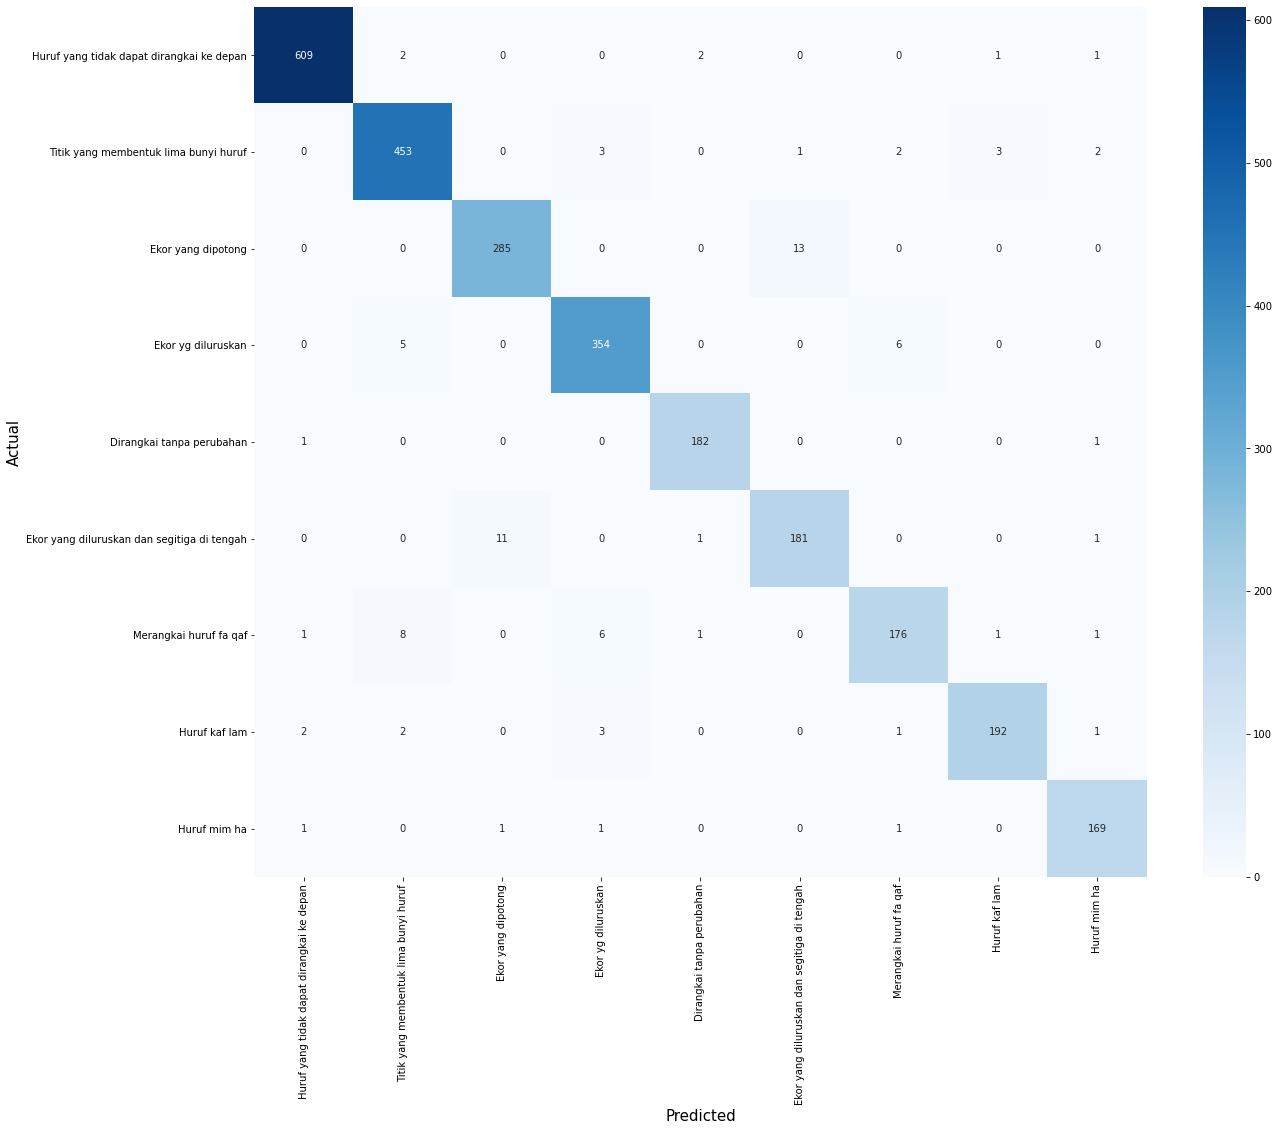

In [9]:
# menghitung accuracy menggunakan confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
ypred = model.predict(x_test)
cnn_accuracy = accuracy_score(y_test, ypred.argmax(axis=-1))
print("CNN Accuracy:",cnn_accuracy)
cnn_cn = confusion_matrix(y_test,ypred.argmax(axis=-1))
plt.subplots(figsize=(20,16))
sns.heatmap(cnn_cn,annot=True,fmt="1d",cmap="Blues",cbar=True,xticklabels=categories,yticklabels=categories)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
# plt.savefig('model60_e40.png')
plt.show()

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred.argmax(axis=-1),target_names= categories))

                                             precision    recall  f1-score   support

  Huruf yang tidak dapat dirangkai ke depan       0.99      0.99      0.99       615
      Titik yang membentuk lima bunyi huruf       0.96      0.98      0.97       464
                         Ekor yang dipotong       0.96      0.96      0.96       298
                         Ekor yg diluruskan       0.96      0.97      0.97       365
                  Dirangkai tanpa perubahan       0.98      0.99      0.98       184
Ekor yang diluruskan dan segitiga di tengah       0.93      0.93      0.93       194
                     Merangkai huruf fa qaf       0.95      0.91      0.93       194
                              Huruf kaf lam       0.97      0.96      0.96       201
                               Huruf mim ha       0.96      0.98      0.97       173

                                   accuracy                           0.97      2688
                                  macro avg       0.96      0.9

Text(0.5, 1.0, 'Accuracy Curves')

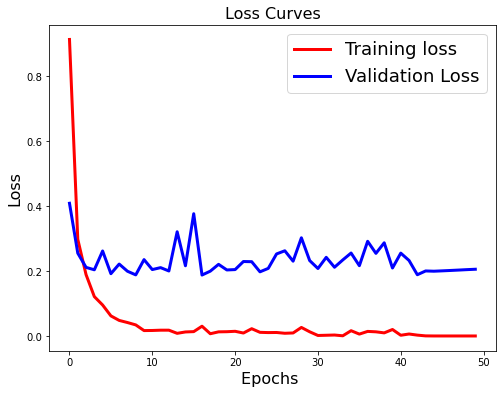

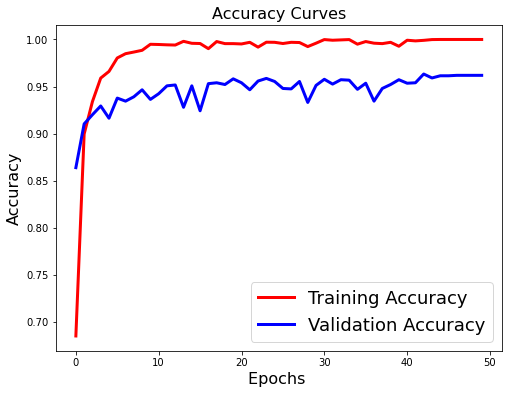

In [11]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(model_history.history['loss'],'r',linewidth=3.0)
plt.plot(model_history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(model_history.history['accuracy'],'r',linewidth=3.0) 
plt.plot(model_history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [12]:
# save model
# model.save('model90_e10.h5')
model.save('tamam_model.h5')

In [ ]:
#Detektor

In [2]:
model_load = tf.keras.models.load_model('tamam_model.h5')
print('loaded')

loaded


In [8]:
import random
perintah = ['Huruf yang tidak dapat dirangkai ke depan', 'Titik yang membentuk lima bunyi huruf', 'Ekor yang dipotong', 'Ekor yg diluruskan', 'Dirangkai tanpa perubahan', 'Ekor yang diluruskan dan segitiga di tengah', 'Merangkai huruf fa qaf', 'Huruf kaf lam', 'Huruf mim ha']

print("Tulislah: ")
random.choice(perintah)

Tulislah: 


'Huruf kaf lam'

Kelas : Huruf kaf lam


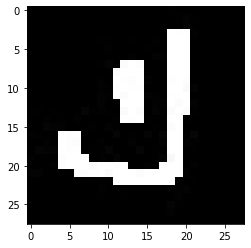

In [16]:
path = "hijaiyah/kaf-hitam.jpg"
img = image.load_img(path, target_size=(28,28))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model_load.predict(images, batch_size=10)

m = 0.00000
for category in range(len(categories)):
  if m < classes[0][category]:
    m = category
if m==0:
  print("Kelas : Huruf yang tidak dapat dirangkai ke depan")
elif m==1:
  print("Kelas : Titik yang membentuk lima bunyi huruf")
elif m==2:
  print("Kelas : Ekor yang dipotong")
elif m==3:
  print("Kelas : Ekor yg diluruskan")
elif m==4:
  print("Kelas : Dirangkai tanpa perubahan")
elif m==5:
  print("Kelas : Ekor yang diluruskan dan segitiga di tengah")
elif m==6:
  print("Kelas : Merangkai huruf fa qaf")     
elif m==7:
  print("Kelas : Huruf kaf lam")
elif m==8:
  print("Kelas : Huruf mim ha")
else:
  print("Kelas : tidak terdeteksi")

In [15]:
jawaban=['Huruf yang tidak dapat dirangkai ke depan', 'Titik yang membentuk lima bunyi huruf', 'Ekor yang dipotong', 'Ekor yg diluruskan', 'Dirangkai tanpa perubahan', 'Ekor yang diluruskan dan segitiga di tengah', 'Merangkai huruf fa qaf', 'Huruf kaf lam', 'Huruf mim ha']

if perintah==jawaban:
    print("Benar")
else:
    print("Salah")

NameError: name 'perintah' is not defined